# Obtaining mutational configurations
So far, we have only looked at statistics based on branch lengths of the coalescent tree. However, when dealing with short sequences, we may not have enough mutations to compute stable branch-length-based summary statistics. Instead, we may like to obtain the distribution of mutational counts. It is particularly informative to consider the SFS computed over small non-recombining blocks.

```{note}
This currently only works for a single epoch, i.e. a time-homogeneous demography, and recombination is not supported.
```

In the following example we obtain the first 8 unfolded mutational configuration probabilities under a simple coalescent distribution using a mutation rate of 1. {meth}`~phasegen.distributions.UnfoldedSFSDistribution.get_mutation_configs` returns a generator that yields the mutational configurations in the order of increasing number of mutations. Each configuration is a vector of length `n-1` where the `i`th entry denote the number of mutations with multiplicities `i+1`, and `n` is the number of lineages. For example, `[1, 1, 0]` means that there is one singleton, one doubleton, and no tripleton mutations.

In [5]:
import phasegen as pg
import pandas as pd
from itertools import islice

coal = pg.Coalescent(n=4)

pd.DataFrame(islice(coal.sfs.get_mutation_configs(theta=1), 8))

,0,1
0,"[0, 0, 0]",0.100000
1,"[1, 0, 0]",0.095556
2,"[0, 1, 0]",0.038889
3,"[0, 0, 1]",0.022222
4,"[2, 0, 0]",0.064148
5,"[1, 1, 0]",0.037778
6,"[0, 2, 0]",0.021296
7,"[1, 0, 1]",0.031111


The number of mutational configurations is infinite since we may have arbitrarily many mutations, albeit with increasingly lower probabilities depending on the mutation rate and coalescent distribution. We may also wish to obtain probabilities until we have reached a certain probability mass threshold. We can do this by consuming the generator while keeping track of the {attr}`~phasegen.distributions.UnfoldedSFSDistribution.generated_mass` attribute. In the following example, we obtain mutational configurations until the generated mass is above 0.8.

In [6]:
it = coal.sfs.get_mutation_configs(theta=1)

# continue until generated mass is above 0.8
pd.DataFrame(pg.utils.takewhile_inclusive(lambda _: coal.sfs.generated_mass < 0.8, it))

,0,1
0,"[0, 0, 0]",0.100000
1,"[1, 0, 0]",0.095556
2,"[0, 1, 0]",0.038889
3,"[0, 0, 1]",0.022222
4,"[2, 0, 0]",0.064148
...,...,...
56,"[6, 0, 0]",0.004477
57,"[5, 1, 0]",0.004898
58,"[4, 2, 0]",0.004633
59,"[3, 3, 0]",0.004545


Alternatively, we can obtain the probability of a specific mutational configuration (cf. {meth}`~phasegen.distributions.UnfoldedSFSDistribution.get_mutation_config`).

In [7]:
coal.sfs.get_mutation_config([1, 1, 0], theta=1)

0.03777777777777778

We can also do the same for folded configurations. In this case, the configurations are vectors of length `n // 2`. For example, configuration `[1, 1]` denotes one singleton or tripleton and one doubleton mutation.   

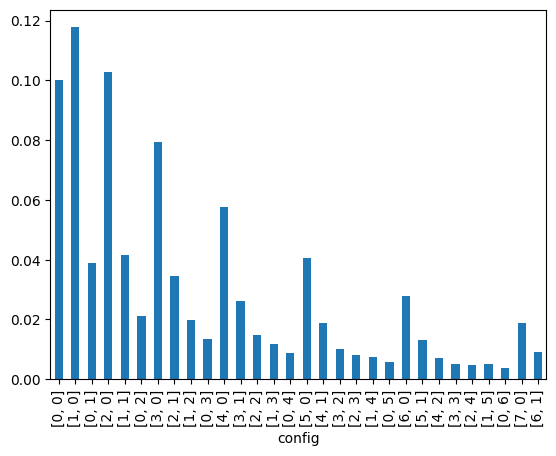

In [16]:
pd.DataFrame(islice(coal.fsfs.get_mutation_configs(theta=1), 30)).plot(kind='bar', x=0, legend=False, xlabel='config');